In [1]:
## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
phar_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
phar_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = phar_data_df["Mouse ID"].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = phar_data_df.loc[phar_data_df[["Mouse ID", "Timepoint"]].duplicated()==True]
dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
k403_data = phar_data_df.loc[phar_data_df["Mouse ID"]=="k403"]
k403_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
nondup_phar_df = phar_data_df.drop_duplicates(["Mouse ID","Timepoint"])
nondup_phar_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
nondup_phar_df["Mouse ID"].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
nondup_phar_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mn=nondup_phar_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_med=nondup_phar_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_var=nondup_phar_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std=nondup_phar_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_erm=nondup_phar_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
drug_sum=pd.DataFrame({"Mean": drug_mn, "Median": drug_med, "Variance": drug_var, "Standard Deviation": drug_std, "Standard Error of the Means": drug_erm})
drug_sum

,Mean,Median,Variance,Standard Deviation,Standard Error of the Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
alt_drug_sum=nondup_phar_df.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
alt_drug_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

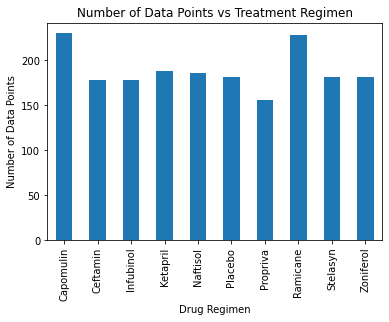

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_bpd=nondup_phar_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
drug_bg=drug_bpd.plot.bar(rot='vertical',title='Number of Data Points vs Treatment Regimen')
drug_bg.set_xlabel("Drug Regimen")
drug_bg.set_ylabel("Number of Data Points")                                  


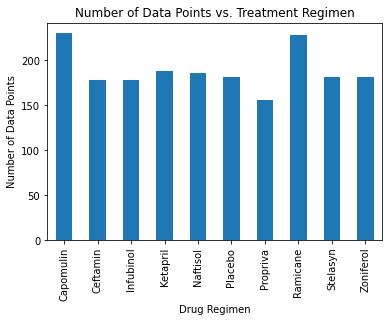

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_bpd=nondup_phar_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
drug_bpd_df=pd.DataFrame(drug_bpd)
plt.xdata=drug_bpd_df.plot.bar(legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points vs. Treatment Regimen")
plt.show()


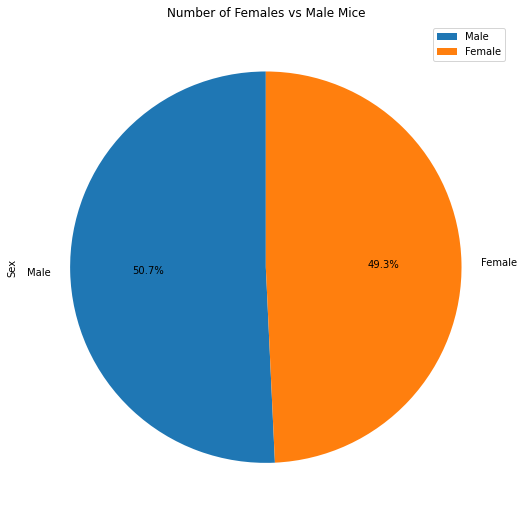

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen_pie=nondup_phar_df["Sex"].value_counts()
gen_pie_chart=gen_pie.plot(kind="pie",autopct="%1.1f%%",figsize=(9,9), startangle=90)
gen_pie_chart.legend(["Male","Female"],loc="best")
gen_pie_chart.set_title("Number of Females vs Male Mice")
plt.show()

Text(0.5, 1.0, 'Number of Females vs Male Mice')

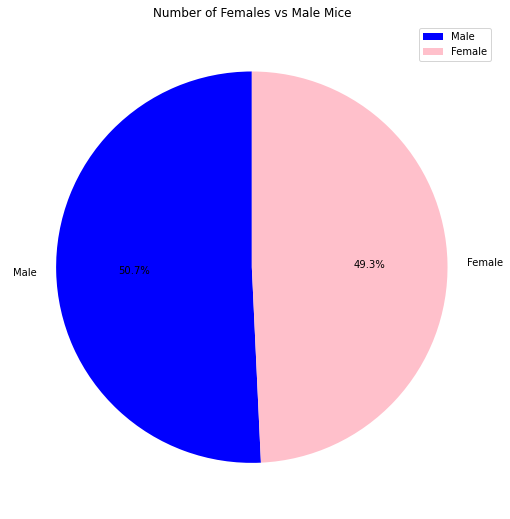

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gen_pie=nondup_phar_df["Sex"].value_counts()
gens=["Male","Female"]
colors=["blue","pink"]
plt.figure(figsize=(9,9))
plt.pie(gen_pie, labels=gens, colors=colors, autopct="%1.1f%%", startangle=90)
plt.legend(["Male","Female"],loc="best")
plt.title("Number of Females vs Male Mice")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
